In [121]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

In [122]:
Moviedata = pd.read_csv('AfterEDA-Cleaning.csv')
Moviedata.head()

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114


In [123]:
#Preparation of Data Frames
X = Moviedata[['Rotten','Runtime', 'Age of Movie', 'Age Category', 'Genres', 'Country', 'Language']]
Y = Moviedata['IMDb']

#Creating Dummy Variables for Categorical Variables 
X = pd.get_dummies(data=X, drop_first=True)

In [ ]:
X.head()

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4726 entries, 0 to 4725
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Rotten                  4726 non-null   int64
 1   Runtime                 4726 non-null   int64
 2   Age of Movie            4726 non-null   int64
 3   Age Category_16+        4726 non-null   uint8
 4   Age Category_18+        4726 non-null   uint8
 5   Age Category_7+         4726 non-null   uint8
 6   Age Category_all        4726 non-null   uint8
 7   Genres_Adventure        4726 non-null   uint8
 8   Genres_Animation        4726 non-null   uint8
 9   Genres_Biography        4726 non-null   uint8
 10  Genres_Comedy           4726 non-null   uint8
 11  Genres_Crime            4726 non-null   uint8
 12  Genres_Documentary      4726 non-null   uint8
 13  Genres_Drama            4726 non-null   uint8
 14  Genres_Family           4726 non-null   uint8
 15  Genres_Fantasy       

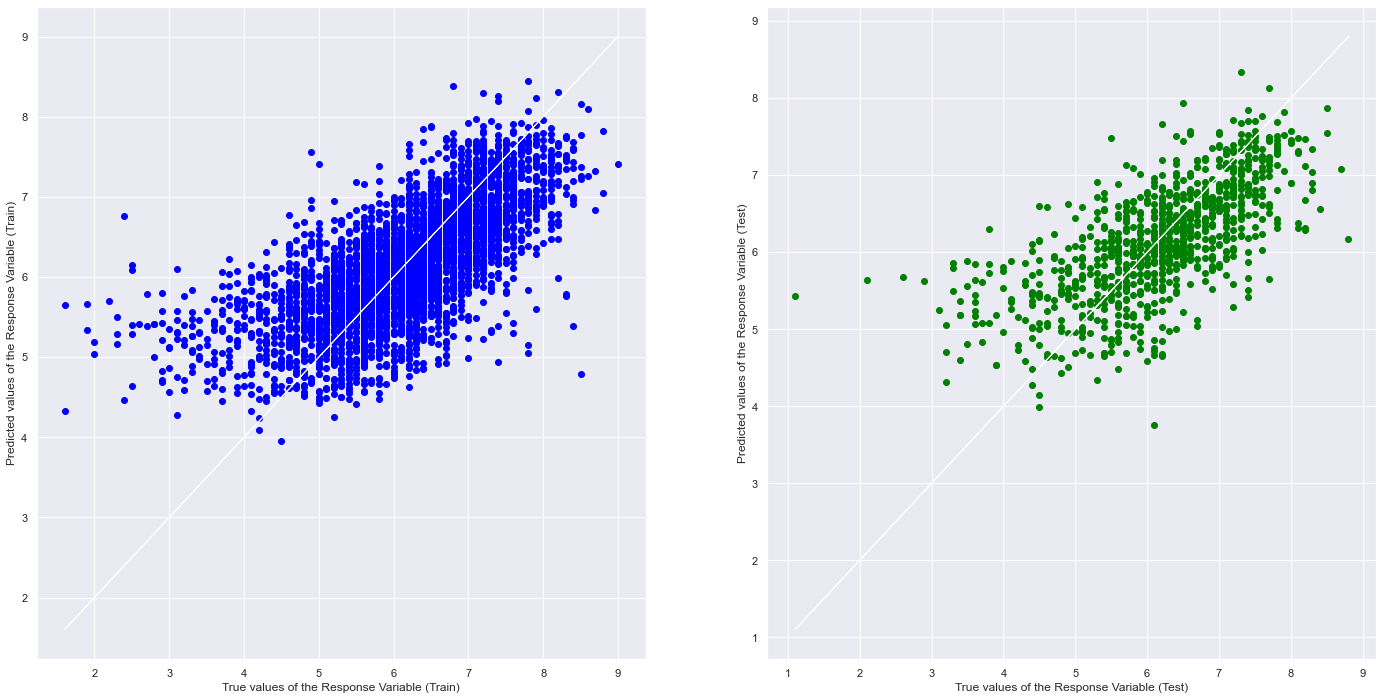

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


#Linear Regression using Train Data
model = LinearRegression() #Create the Linear Regression Object
model.fit(X_train,y_train) #Train the Linear Regression Model

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict IMDb values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [127]:
# print the intercept
print(model.intercept_)

#Base Score??

3.335709118632754


In [135]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4771869424770463
Mean Squared Error (MSE) 	: 0.5852238735827635

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44882014507754986
Mean Squared Error (MSE) 	: 0.6233529827826998

